In [1]:
#pip install tensorflow

In [2]:
#pip install keras

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",100)

2022-11-09 14:35:53.140699: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
df1=pd.read_csv("ttrain.csv")
df2=pd.read_csv("ttest.csv")

In [5]:
df=pd.concat([df1,df2],ignore_index=True)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [8]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean())
df["Embarked"]=df["Embarked"].fillna("S")

In [10]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [11]:
# Extracting Mr Mrs expressions in #Name column
df['Tittle']=df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [12]:
df.Tittle.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Tittle, dtype: int64

In [13]:
df['Tittle']=df['Tittle'].replace(['Ms','Mlle'],'Miss')
df['Tittle']=df['Tittle'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Tittle']=df['Tittle'].replace(['Dr','Major','Col','Capt','Sir','Rev','Jonkheer','Don'],'Mr')

In [14]:
df.Tittle.value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Tittle, dtype: int64

In [15]:
del df["Cabin"]
df.drop("Name",axis=1,inplace=True)

In [16]:
df["Family"]=df["SibSp"]+df["Parch"]+1

In [17]:
df["Age"].fillna(df.groupby("Tittle")["Age"].transform("median"),inplace=True)

In [18]:
df["Embarked"]=df["Embarked"].fillna("S")

In [19]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Tittle           0
Family           0
dtype: int64

In [20]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Tittle,Family
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,S,Mrs,2
4,5,0.0,3,male,35.0,0,0,373450,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,30.0,0,0,A.5. 3236,8.0500,S,Mr,1
1305,1306,NaN,1,female,39.0,0,0,PC 17758,108.9000,C,Mrs,1
1306,1307,NaN,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr,1
1307,1308,NaN,3,male,30.0,0,0,359309,8.0500,S,Mr,1


In [21]:
df.drop(["Ticket"], axis=1, inplace=True)

In [22]:
df=pd.get_dummies(df,drop_first=True)

In [23]:
x,y=df[:891].drop("Survived",axis=1),df[:891][["Survived"]]

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [25]:
# for all models use that function

def result(model,count):
    predict_x=model.predict(df[891:].drop("Survived",axis=1))
    result_dataset=pd.DataFrame()
    result_dataset["PassengerId"]=df[891:]["PassengerId"]
    result_dataset["Predict"]=predict_x
    result_dataset["Survived"]=result_dataset["Predict"].map(lambda s:1 if s>=0.5 else 0 )
    print(result_dataset["Survived"].value_counts().plot.bar())
    result_dataset.drop("Predict",axis=1).to_csv("titanic_deep_learning_result_model{}.csv".format(count),index=False)
    return result_dataset 

In [26]:
# First Model

In [27]:
model=Sequential()
model.add(Dense(14,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

2022-11-09 14:36:01.988639: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [29]:
model.fit(x,y,epochs=150,batch_size=10,verbose=1)

Epoch 1/150
90/90 [==============================] - 1s 1ms/step - loss: 9.4544 - accuracy: 0.3895
Epoch 2/150
90/90 [==============================] - 0s 1ms/step - loss: 0.7076 - accuracy: 0.5982
Epoch 3/150
90/90 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.6094
Epoch 4/150
90/90 [==============================] - 0s 1ms/step - loss: 0.6792 - accuracy: 0.6094
Epoch 5/150
90/90 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.6105
Epoch 6/150
90/90 [==============================] - 0s 1ms/step - loss: 0.6733 - accuracy: 0.6195
Epoch 7/150
90/90 [==============================] - 0s 1ms/step - loss: 0.6714 - accuracy: 0.6207
Epoch 8/150
90/90 [==============================] - 0s 1ms/step - loss: 0.6692 - accuracy: 0.6207
Epoch 9/150
90/90 [==============================] - 0s 1ms/step - loss: 0.6678 - accuracy: 0.6162
Epoch 10/150
90/90 [==============================] - 0s 1ms/step - loss: 0.6664 - accuracy: 0.6240
Epoch 11/

90/90 [==============================] - 0s 1ms/step - loss: 0.6506 - accuracy: 0.6364
Epoch 84/150
90/90 [==============================] - 0s 1ms/step - loss: 0.6502 - accuracy: 0.6352
Epoch 85/150
90/90 [==============================] - 0s 1ms/step - loss: 0.6524 - accuracy: 0.6420
Epoch 86/150
90/90 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.6510
Epoch 87/150
90/90 [==============================] - 0s 1ms/step - loss: 0.6603 - accuracy: 0.6229
Epoch 88/150
90/90 [==============================] - 0s 1ms/step - loss: 0.6499 - accuracy: 0.6364
Epoch 89/150
90/90 [==============================] - 0s 1ms/step - loss: 0.6507 - accuracy: 0.6330
Epoch 90/150
90/90 [==============================] - 0s 1ms/step - loss: 0.6518 - accuracy: 0.6330
Epoch 91/150
90/90 [==============================] - 0s 1ms/step - loss: 0.6500 - accuracy: 0.6341
Epoch 92/150
90/90 [==============================] - 0s 1ms/step - loss: 0.6492 - accuracy: 0.6364
Epoch 93/150


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                196       
                                                                 
 dense_1 (Dense)             (None, 10)                150       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
 dense_3 (Dense)             (None, 3)                 21        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 437
Trainable params: 437
Non-trainable params: 0
_________________________________________________________________


In [31]:
scores=model.evaluate(x,y) # Success rate

28/28 [==============================] - 0s 1ms/step - loss: 0.4556 - accuracy: 0.8103


In [32]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 81.03%


14/14 [==============================] - 0s 1ms/step
AxesSubplot(0.125,0.125;0.775x0.755)


,PassengerId,Predict,Survived
891,892,0.197978,0
892,893,0.375718,0
893,894,0.197978,0
894,895,0.197978,0
895,896,0.438368,0
...,...,...,...
1304,1305,0.197978,0
1305,1306,0.997674,1
1306,1307,0.197978,0
1307,1308,0.197978,0


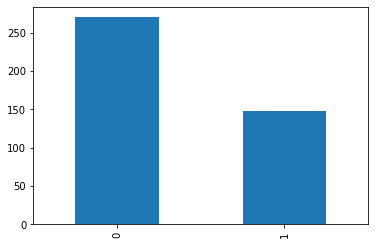

In [33]:
result(model,1)

In [34]:
history=model.fit(x,y,epochs=150,batch_size=10,verbose=1)

Epoch 1/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.8036
Epoch 2/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4674 - accuracy: 0.7935
Epoch 3/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4659 - accuracy: 0.8013
Epoch 4/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4618 - accuracy: 0.8025
Epoch 5/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4549 - accuracy: 0.8058
Epoch 6/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4626 - accuracy: 0.8047
Epoch 7/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.8070
Epoch 8/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4727 - accuracy: 0.7823
Epoch 9/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4531 - accuracy: 0.8047
Epoch 10/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4523 - accuracy: 0.8013
Epoch 11/

90/90 [==============================] - 0s 1ms/step - loss: 0.4215 - accuracy: 0.8058
Epoch 84/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4320 - accuracy: 0.8148
Epoch 85/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4224 - accuracy: 0.8081
Epoch 86/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.8148
Epoch 87/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4180 - accuracy: 0.8126
Epoch 88/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.8182
Epoch 89/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4103 - accuracy: 0.8171
Epoch 90/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.8159
Epoch 91/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4213 - accuracy: 0.8193
Epoch 92/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.8036
Epoch 93/150


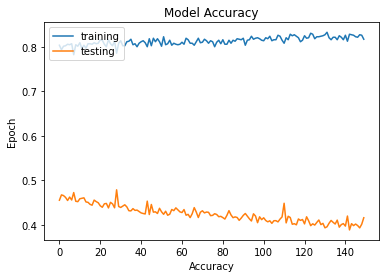

In [35]:
fig1=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")

In [36]:
# Second Model

In [37]:
model=Sequential()
model.add(Dense(14,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [38]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [39]:
model.fit(x,y,validation_split=0.2,epochs=150,batch_size=10,verbose=2)

Epoch 1/150
72/72 - 1s - loss: 1.4737 - accuracy: 0.5618 - val_loss: 0.5999 - val_accuracy: 0.7151 - 871ms/epoch - 12ms/step
Epoch 2/150
72/72 - 0s - loss: 0.7337 - accuracy: 0.6587 - val_loss: 0.7118 - val_accuracy: 0.7207 - 137ms/epoch - 2ms/step
Epoch 3/150
72/72 - 0s - loss: 0.6493 - accuracy: 0.6699 - val_loss: 0.5983 - val_accuracy: 0.7151 - 112ms/epoch - 2ms/step
Epoch 4/150
72/72 - 0s - loss: 0.6242 - accuracy: 0.6854 - val_loss: 0.6616 - val_accuracy: 0.7318 - 109ms/epoch - 2ms/step
Epoch 5/150
72/72 - 0s - loss: 0.5891 - accuracy: 0.6966 - val_loss: 0.6549 - val_accuracy: 0.7151 - 110ms/epoch - 2ms/step
Epoch 6/150
72/72 - 0s - loss: 0.5869 - accuracy: 0.6826 - val_loss: 0.8167 - val_accuracy: 0.7095 - 113ms/epoch - 2ms/step
Epoch 7/150
72/72 - 0s - loss: 0.5860 - accuracy: 0.7051 - val_loss: 0.8013 - val_accuracy: 0.7374 - 133ms/epoch - 2ms/step
Epoch 8/150
72/72 - 0s - loss: 0.5971 - accuracy: 0.6826 - val_loss: 0.6165 - val_accuracy: 0.7095 - 116ms/epoch - 2ms/step
Epoch 9

Epoch 67/150
72/72 - 0s - loss: 0.4459 - accuracy: 0.8034 - val_loss: 0.4176 - val_accuracy: 0.8101 - 214ms/epoch - 3ms/step
Epoch 68/150
72/72 - 0s - loss: 0.4558 - accuracy: 0.7963 - val_loss: 0.3945 - val_accuracy: 0.7989 - 185ms/epoch - 3ms/step
Epoch 69/150
72/72 - 0s - loss: 0.4439 - accuracy: 0.7795 - val_loss: 0.4251 - val_accuracy: 0.8045 - 170ms/epoch - 2ms/step
Epoch 70/150
72/72 - 0s - loss: 0.4385 - accuracy: 0.8006 - val_loss: 0.4288 - val_accuracy: 0.7765 - 136ms/epoch - 2ms/step
Epoch 71/150
72/72 - 0s - loss: 0.4631 - accuracy: 0.7851 - val_loss: 0.5935 - val_accuracy: 0.7430 - 137ms/epoch - 2ms/step
Epoch 72/150
72/72 - 0s - loss: 0.4388 - accuracy: 0.7921 - val_loss: 0.4140 - val_accuracy: 0.7877 - 187ms/epoch - 3ms/step
Epoch 73/150
72/72 - 0s - loss: 0.4360 - accuracy: 0.7978 - val_loss: 0.4668 - val_accuracy: 0.7709 - 138ms/epoch - 2ms/step
Epoch 74/150
72/72 - 0s - loss: 0.4338 - accuracy: 0.7963 - val_loss: 0.4137 - val_accuracy: 0.7765 - 169ms/epoch - 2ms/step


Epoch 133/150
72/72 - 0s - loss: 0.4199 - accuracy: 0.8104 - val_loss: 0.4169 - val_accuracy: 0.7765 - 120ms/epoch - 2ms/step
Epoch 134/150
72/72 - 0s - loss: 0.4253 - accuracy: 0.8048 - val_loss: 0.4011 - val_accuracy: 0.8045 - 113ms/epoch - 2ms/step
Epoch 135/150
72/72 - 0s - loss: 0.4262 - accuracy: 0.8076 - val_loss: 0.4187 - val_accuracy: 0.8101 - 114ms/epoch - 2ms/step
Epoch 136/150
72/72 - 0s - loss: 0.4184 - accuracy: 0.8090 - val_loss: 0.3967 - val_accuracy: 0.8101 - 112ms/epoch - 2ms/step
Epoch 137/150
72/72 - 0s - loss: 0.4211 - accuracy: 0.8132 - val_loss: 0.4465 - val_accuracy: 0.7765 - 115ms/epoch - 2ms/step
Epoch 138/150
72/72 - 0s - loss: 0.4304 - accuracy: 0.7949 - val_loss: 0.4600 - val_accuracy: 0.7765 - 115ms/epoch - 2ms/step
Epoch 139/150
72/72 - 0s - loss: 0.4329 - accuracy: 0.8006 - val_loss: 0.4205 - val_accuracy: 0.8101 - 110ms/epoch - 2ms/step
Epoch 140/150
72/72 - 0s - loss: 0.4268 - accuracy: 0.8132 - val_loss: 0.4688 - val_accuracy: 0.7821 - 129ms/epoch - 2

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 14)                196       
                                                                 
 dense_6 (Dense)             (None, 9)                 135       
                                                                 
 dense_7 (Dense)             (None, 4)                 40        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 376
Trainable params: 376
Non-trainable params: 0
_________________________________________________________________


In [41]:
scores=model.evaluate(x,y) # Success rate

28/28 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.8159


In [42]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 81.59%


14/14 [==============================] - 0s 995us/step
AxesSubplot(0.125,0.125;0.775x0.755)


,PassengerId,Predict,Survived
891,892,0.144069,0
892,893,0.425471,0
893,894,0.105633,0
894,895,0.133109,0
895,896,0.613894,1
...,...,...,...
1304,1305,0.094385,0
1305,1306,0.999946,1
1306,1307,0.069335,0
1307,1308,0.094240,0


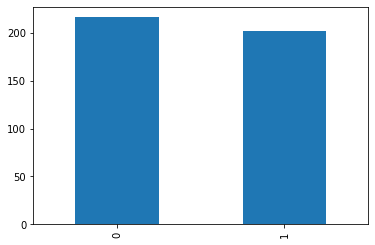

In [43]:
result(model,2)

In [44]:
history=model.fit(x,y,validation_split=0.2,epochs=200,batch_size=10,verbose=2)

Epoch 1/200
72/72 - 0s - loss: 0.4342 - accuracy: 0.8076 - val_loss: 0.4175 - val_accuracy: 0.8212 - 154ms/epoch - 2ms/step
Epoch 2/200
72/72 - 0s - loss: 0.4319 - accuracy: 0.8076 - val_loss: 0.4463 - val_accuracy: 0.7989 - 117ms/epoch - 2ms/step
Epoch 3/200
72/72 - 0s - loss: 0.4203 - accuracy: 0.8104 - val_loss: 0.4145 - val_accuracy: 0.8101 - 114ms/epoch - 2ms/step
Epoch 4/200
72/72 - 0s - loss: 0.4105 - accuracy: 0.8118 - val_loss: 0.4017 - val_accuracy: 0.8212 - 134ms/epoch - 2ms/step
Epoch 5/200
72/72 - 0s - loss: 0.4339 - accuracy: 0.8020 - val_loss: 0.4229 - val_accuracy: 0.7765 - 154ms/epoch - 2ms/step
Epoch 6/200
72/72 - 0s - loss: 0.4182 - accuracy: 0.8230 - val_loss: 0.4768 - val_accuracy: 0.7821 - 115ms/epoch - 2ms/step
Epoch 7/200
72/72 - 0s - loss: 0.4317 - accuracy: 0.8104 - val_loss: 0.5741 - val_accuracy: 0.7765 - 112ms/epoch - 2ms/step
Epoch 8/200
72/72 - 0s - loss: 0.4226 - accuracy: 0.8146 - val_loss: 0.4207 - val_accuracy: 0.7765 - 121ms/epoch - 2ms/step
Epoch 9/

Epoch 67/200
72/72 - 0s - loss: 0.4121 - accuracy: 0.8202 - val_loss: 0.3925 - val_accuracy: 0.8156 - 113ms/epoch - 2ms/step
Epoch 68/200
72/72 - 0s - loss: 0.4268 - accuracy: 0.8104 - val_loss: 0.3884 - val_accuracy: 0.8380 - 114ms/epoch - 2ms/step
Epoch 69/200
72/72 - 0s - loss: 0.4180 - accuracy: 0.8146 - val_loss: 0.4419 - val_accuracy: 0.7989 - 118ms/epoch - 2ms/step
Epoch 70/200
72/72 - 0s - loss: 0.4110 - accuracy: 0.8090 - val_loss: 0.5823 - val_accuracy: 0.7709 - 114ms/epoch - 2ms/step
Epoch 71/200
72/72 - 0s - loss: 0.4163 - accuracy: 0.8188 - val_loss: 0.4157 - val_accuracy: 0.8101 - 121ms/epoch - 2ms/step
Epoch 72/200
72/72 - 0s - loss: 0.4042 - accuracy: 0.8216 - val_loss: 0.4850 - val_accuracy: 0.8045 - 122ms/epoch - 2ms/step
Epoch 73/200
72/72 - 0s - loss: 0.4167 - accuracy: 0.8174 - val_loss: 0.4003 - val_accuracy: 0.8045 - 117ms/epoch - 2ms/step
Epoch 74/200
72/72 - 0s - loss: 0.4148 - accuracy: 0.8146 - val_loss: 0.3862 - val_accuracy: 0.8268 - 118ms/epoch - 2ms/step


Epoch 133/200
72/72 - 0s - loss: 0.4022 - accuracy: 0.8202 - val_loss: 0.4298 - val_accuracy: 0.7709 - 114ms/epoch - 2ms/step
Epoch 134/200
72/72 - 0s - loss: 0.4113 - accuracy: 0.8076 - val_loss: 0.4102 - val_accuracy: 0.8101 - 114ms/epoch - 2ms/step
Epoch 135/200
72/72 - 0s - loss: 0.3948 - accuracy: 0.8216 - val_loss: 0.4073 - val_accuracy: 0.8156 - 112ms/epoch - 2ms/step
Epoch 136/200
72/72 - 0s - loss: 0.4015 - accuracy: 0.8244 - val_loss: 0.4068 - val_accuracy: 0.8324 - 115ms/epoch - 2ms/step
Epoch 137/200
72/72 - 0s - loss: 0.4060 - accuracy: 0.8216 - val_loss: 0.4080 - val_accuracy: 0.8268 - 115ms/epoch - 2ms/step
Epoch 138/200
72/72 - 0s - loss: 0.4005 - accuracy: 0.8174 - val_loss: 0.4144 - val_accuracy: 0.8156 - 113ms/epoch - 2ms/step
Epoch 139/200
72/72 - 0s - loss: 0.4192 - accuracy: 0.8174 - val_loss: 0.4301 - val_accuracy: 0.7765 - 109ms/epoch - 2ms/step
Epoch 140/200
72/72 - 0s - loss: 0.3982 - accuracy: 0.8301 - val_loss: 0.6517 - val_accuracy: 0.7542 - 112ms/epoch - 2

72/72 - 0s - loss: 0.3970 - accuracy: 0.8315 - val_loss: 0.4091 - val_accuracy: 0.8045 - 139ms/epoch - 2ms/step
Epoch 199/200
72/72 - 0s - loss: 0.3944 - accuracy: 0.8244 - val_loss: 0.4212 - val_accuracy: 0.7877 - 113ms/epoch - 2ms/step
Epoch 200/200
72/72 - 0s - loss: 0.3934 - accuracy: 0.8301 - val_loss: 0.4297 - val_accuracy: 0.8045 - 116ms/epoch - 2ms/step


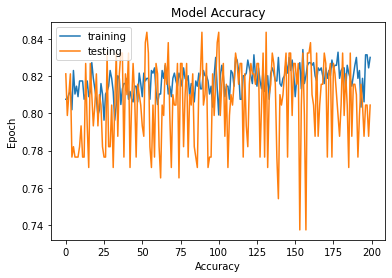

In [45]:
fig1=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")

<function matplotlib.pyplot.show(close=None, block=None)>

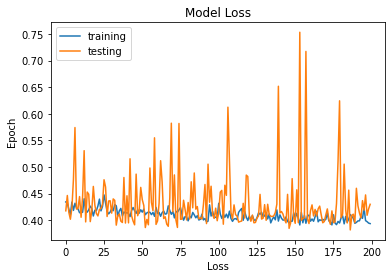

In [46]:
fig1=plt.figure(2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Loss")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")

plt.show